In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import os


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
!python -V

Python 3.12.4


In [11]:
from ucimlrepo import fetch_ucirepo 

total_steps = 100  # Number of steps to complete
id = 602  # Dataset ID to fetch


with tqdm(total=total_steps, unit='%', desc=f"Fetching dataset ID: {id}") as pbar:
        for _ in range(total_steps):
            time.sleep(0.05)  # Simulate some delay for the progress bar
            pbar.update(1)  # Update progress bar by 1 step
            if _ == total_steps // 2:
                dry_bean = fetch_ucirepo(id=id) # fetch dataset
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets


Fetching dataset ID: 602: 100%|██████████| 100/100 [00:23<00:00,  4.32%/s]


In [44]:
# with open('../data/dry_bean.csv', 'w') as f:
#     dry_bean.to_csv(f, index=False)

In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

In [2]:
df = pd.read_csv('data/dry_bean.csv')

In [3]:
df.shape

(13611, 17)

In [4]:
print(f"Sum of null values in dataset: {df.isnull().sum().sum()}")

Sum of null values in dataset: 0


In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000
mean,53048.285,855.283,320.142,202.271,1.583,0.751,53768.200,253.064,0.750,0.987,0.873,0.800,0.007,0.002,0.644,0.995
std,29324.096,214.290,85.694,44.970,0.247,0.092,29774.916,59.177,0.049,0.005,0.060,0.062,0.001,0.001,0.099,0.004
min,20420.000,524.736,183.601,122.513,1.025,0.219,20684.000,161.244,0.555,0.919,0.490,0.641,0.003,0.001,0.410,0.948
25%,36328.000,703.524,253.304,175.848,1.432,0.716,36714.500,215.068,0.719,0.986,0.832,0.762,0.006,0.001,0.581,0.994
50%,44652.000,794.941,296.883,192.432,1.551,0.764,45178.000,238.438,0.760,0.988,0.883,0.801,0.007,0.002,0.642,0.996
75%,61332.000,977.213,376.495,217.032,1.707,0.810,62294.000,279.446,0.787,0.990,0.917,0.834,0.007,0.002,0.696,0.998
max,254616.000,1985.370,738.860,460.198,2.430,0.911,263261.000,569.374,0.866,0.995,0.991,0.987,0.010,0.004,0.975,1.000


In [7]:
from sklearn.model_selection import train_test_split
train_df, temp = train_test_split(df, test_size=0.3, random_state=42, stratify = df['Class'])
val_df, test_df = train_test_split(temp, test_size=0.4, random_state=42, stratify = temp['Class'])

In [8]:
print(f'train shape: {train_df.shape}')
print(f'val shape: {val_df.shape}')
print(f'test shape: {test_df.shape}')

train shape: (9527, 17)
val shape: (2450, 17)
test shape: (1634, 17)


In [9]:
def save_to_csv(df, file_path, filename):
    filename = os.path.join(file_path, filename)
    df.to_csv(filename, index=False)

In [10]:
# Save train, test, and validation data

FILE_PATH = "data"
save_to_csv(train_df, FILE_PATH, "train.csv")
save_to_csv(val_df, FILE_PATH, "validate.csv")
save_to_csv(test_df, FILE_PATH, "test.csv")

**Label Encoding**

The "Class" column contains string values, so we need to convert these labels into a numeric form using label encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_df["Class"] = labelencoder.fit_transform(train_df['Class'])
val_df["Class"] = labelencoder.fit_transform(val_df['Class'])

In [12]:
train_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
12563,34861,699.286,257.160,172.839,1.488,0.740,35324,210.681,0.719,0.987,0.896,0.819,0.007,0.002,0.671,0.999,3
6172,51106,887.937,369.489,176.544,2.093,0.878,51520,255.089,0.690,0.992,0.815,0.690,0.007,0.001,0.477,0.998,4
1221,40504,740.479,245.542,210.426,1.167,0.515,40946,227.093,0.763,0.989,0.928,0.925,0.006,0.003,0.855,0.998,5
827,38222,709.963,246.271,197.704,1.246,0.596,38555,220.603,0.781,0.991,0.953,0.896,0.006,0.003,0.802,1.000,5
10774,27765,610.322,221.260,160.237,1.381,0.690,28057,188.020,0.810,0.990,0.937,0.850,0.008,0.003,0.722,0.997,3


In [13]:
val_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2977,75351,1095.258,408.409,236.043,1.730,0.816,76285,309.742,0.794,0.988,0.789,0.758,0.005,0.001,0.575,0.995,0
1913,48335,812.408,293.954,209.525,1.403,0.701,48862,248.077,0.735,0.989,0.920,0.844,0.006,0.002,0.712,0.999,5
238,34703,676.387,230.769,191.763,1.203,0.556,35025,210.203,0.773,0.991,0.953,0.911,0.007,0.003,0.830,0.998,5
1684,44436,772.915,270.332,209.535,1.290,0.632,44893,237.861,0.784,0.990,0.935,0.880,0.006,0.002,0.774,0.999,5
13204,38277,729.704,281.092,173.642,1.619,0.786,38676,220.762,0.777,0.990,0.903,0.785,0.007,0.002,0.617,0.998,3


In [9]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df["Class"] = labelencoder.fit_transform(df['Class'])

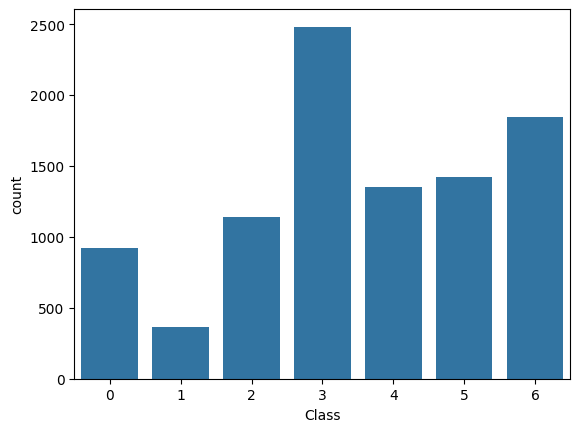

In [14]:
sns.countplot(x = 'Class', data=train_df)
plt.show()

In [25]:
# from sklearn.model_selection import train_test_split

# # Split the data into features and label
# X = df.drop(columns='Class')
# y = df['Class']

# # split dataset into train, test and validation
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify = y_temp)

#### Sampling techniques

In [15]:
# Split train_df and val_df into features and label
X_train = train_df.drop(columns='Class')
y_train = train_df['Class']

X_val = train_df.drop(columns='Class')
y_val = train_df['Class']

In [17]:
# Our dataset has an imbalance in class labels. To prevent this from negatively impacting model performance, we need to address this issue.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", len(X_train_res), len(y_train_res))

After SMOTE: 17374 17374


<Axes: xlabel='Class', ylabel='count'>

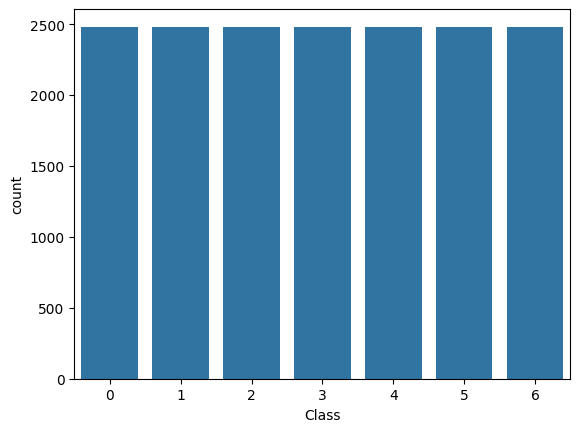

In [18]:
sns.countplot(x = y_train_res)

In [19]:
X_train_res.shape

(17374, 16)

#### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val = scaler.transform(X_val)

In [21]:
# Model training
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_val)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy: %.5f' % accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=np.unique(labelencoder.inverse_transform(train_df["Class"]))))

Accuracy: 0.93062
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.91      0.93       925
      BOMBAY       1.00      1.00      1.00       365
        CALI       0.93      0.96      0.95      1141
    DERMASON       0.93      0.92      0.92      2482
       HOROZ       0.98      0.95      0.96      1350
       SEKER       0.96      0.95      0.95      1419
        SIRA       0.85      0.90      0.87      1845

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527



#### Hyper Parameter tuning and MLflow tracking & experiment

In [24]:
import mlflow

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
MLFLOW_EXPERIMENT_NAME = "dry-bean-detection"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment(MLFLOW_EXPERIMENT_NAME)

<Experiment: artifact_location='file:///c:/Users/b-cichebi/Documents/MLOps-project/MLOps-project/notebook/mlruns/1', creation_time=1723121964576, experiment_id='1', last_update_time=1723121964576, lifecycle_stage='active', name='dry-bean-detection', tags={}>

In [33]:
from typing import Union
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

def random_search_hyperparameter_tuning_classification(X:Union[np.array, pd.DataFrame], y:pd.Series)->pd.DataFrame:
    # input schema for MLflow
    schema = X.head(1)

    param = {
        'Logistic_Regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet'],
                'C': [0.01, 0.1, 1],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']
            }
        },
        'Random_Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [None, 10, 20, 30, 40, 50],
                'criterion': ['gini', 'entropy']
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7, 9],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]
            }
        }
    }

    results = []

    kf = KFold(n_splits=5, shuffle=True, random_state=20)
    for key, values in param.items():

        with mlflow.start_run(run_name = key):

            mlflow.set_tag("developer", "Christian")

            random_search = RandomizedSearchCV(values['model'], values['params'], cv=kf, return_train_score=False, refit=True)
            random_search.fit(X, y)

            # Log parameters
            for param_name, param_value in random_search.best_params_.items():
                mlflow.log_param(param_name, param_value)
            
            # Log metrics
            mlflow.log_metric("best_score", random_search.best_score_)
            
            # Log the model
            if key == 'XGBoost':
                mlflow.xgboost.log_model(random_search.best_estimator_, "xgboost_model", input_example=schema)
            else:
                mlflow.sklearn.log_model(random_search.best_estimator_, "model", input_example=schema)

            results.append({
                'model_name': key,
                'best_score': random_search.best_score_,
                'best_param': random_search.best_params_
            })
    return pd.DataFrame(results, columns=['model_name', 'best_score', 'best_param'])


In [ ]:
random_search_hyperparameter_tuning_classification(X_train_res, y_train_res)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
param = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l2'],
            'C': [0.01],
            'solver': ['newton-cg']
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10],
            'max_features': ['log2'],
            'max_depth': [10],
            'criterion': ['gini']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [50],
            'learning_rate': [0.01],
            'max_depth': [3],
            'subsample': [0.6],
            'colsample_bytree': [0.6]
        }
    }
}

results = []

kf = KFold(n_splits=5, shuffle=True, random_state=20)
for key, values in param.items():

    with mlflow.start_run(run_name = key):

        mlflow.set_tag("developer", "Christian")

        random_search = RandomizedSearchCV(values['model'], values['params'], cv=kf, return_train_score=False, refit=True)
        random_search.fit(X_train, y_train)

        # Log parameters
        for param_name, param_value in random_search.best_params_.items():
            mlflow.log_param(param_name, param_value)
        
        # Log metrics
        mlflow.log_metric("best_score", random_search.best_score_)
        
        # Log the model
        if key == 'XGBoost':
            mlflow.xgboost.log_model(random_search.best_estimator_, "xgboost_model")
        else:
            mlflow.sklearn.log_model(random_search.best_estimator_, "model")

        results.append({
            'model_name': key,
            'best_score': random_search.best_score_,
            'best_param': random_search.best_params_
        })


2024/08/08 16:29:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/08 16:30:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/08 16:30:28 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [ ]:
#mlflow.set_experiment("Kwizat-Haderach")

with mlflow.start_run():

    params = {"C": 0.1, "random_state": 42}
    mlflow.log_params(params)

    lr = LogisticRegression(**params)
    lr.fit(X_train_scaled, y_train)
    y_preds = lr.predict(X_test_scaled)

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_preds)) 

    mlflow.sklearn.log_model(lr, artifact_path="models")

In [142]:
from mlflow import MlflowClient

#mlflow.get_artifact_uri()